Imports

In [1]:
from qiskit import QuantumCircuit, Aer, assemble
import numpy as np
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from numpy import pi
from random import random
from random import seed

Algoritmo base


In [2]:
def rotation_circuit(n, thetas):
  """
  Creates a circuit with rotated qubits (Cx)

  Args:
    n (int): Numbers of qubits
    thetas (list(ints)): Array of rotation angles

  Returns:
    QuantumCircuit
  """

  qc = QuantumCircuit(n)
  
  for i in range(n - 1):
    qc.rx(thetas[i], i)

  qc.barrier()

  return qc


In [3]:
def duration_gate():
  """
  Randomly rotates a qubit
  Args:
  """
  qc = QuantumCircuit(1)
  theta=random()*2*pi
  qc.rx(theta, 0)
  qc.barrier()

  return qc

Algoritmos parametrizados

In [4]:
def entanglement_qutrit(i, j, k):
  """
  Args:
    i (int): Classical bit, 0 or 1
    j (int): Classical bit, 0 or 1
    k (int): Classical bit, 0 or 1
  
  Returns:
    QuantumCircuit: Circuit after applying H gates and CNOTs
  """
  qc = QuantumCircuit(3)
  
  if i == 1:
    qc.h(0)
  if j == 1:
    qc.h(1)
  if k == 1:
    qc.h(2)
  
  qc.cx(0, 1)
  qc.cx(0, 2)
  
  return qc

In [5]:
def entanglement_circuit(n, phase):
  qc = QuantumCircuit(n)
  time_circuit = entanglement_qutrit(1, 0, 0)
  note_circuit = entanglement_qutrit(1, 0, 0)
  
  circuit = qc.compose(time_circuit, [0,1,2]).compose(note_circuit, [3,4,5])
  
  circuit.barrier()

  return circuit

Idea: El entralazamiento "elimina" muchas superposiciones, solo existen algunas viables. Por lo tanto, es una manera de manipular directamente que notas/tiempos se van a tocar. Control directo :)

Pruebas

In [6]:
# Test joining
qc = QuantumCircuit(7)
rotations = rotation_circuit(7, [pi/2, pi, pi/7, pi/5, pi/3, pi/4])
entangled = entanglement_circuit(7, 0)
duration = duration_gate()

qc = qc.compose(rotations).compose(duration, 6).compose(entangled)
qc.draw()

┌─────────┐ ░     ┌───┐                ░ 
q_0: ┤ Rx(π/2) ├─░─────┤ H ├───────■────■───░─
     └┬───────┬┘ ░     └───┘     ┌─┴─┐  │   ░ 
q_1: ─┤ Rx(π) ├──░───────────────┤ X ├──┼───░─
     ┌┴───────┴┐ ░               └───┘┌─┴─┐ ░ 
q_2: ┤ Rx(π/7) ├─░────────────────────┤ X ├─░─
     ├─────────┤ ░     ┌───┐          └───┘ ░ 
q_3: ┤ Rx(π/5) ├─░─────┤ H ├───────■────■───░─
     ├─────────┤ ░     └───┘     ┌─┴─┐  │   ░ 
q_4: ┤ Rx(π/3) ├─░───────────────┤ X ├──┼───░─
     ├─────────┤ ░               └───┘┌─┴─┐ ░ 
q_5: ┤ Rx(π/4) ├─░────────────────────┤ X ├─░─
     └─────────┘ ░ ┌────────────┐  ░  └───┘ ░ 
q_6: ────────────░─┤ Rx(2.9354) ├──░────────░─
                 ░ └────────────┘  ░        ░

In [7]:
svsim = Aer.get_backend('aer_simulator')

# Let's get the result:
qc.save_statevector()
qobj = assemble(qc)
result = svsim.run(qobj).result()

# Print the statevector neatly:
final_state = result.get_statevector()


In [9]:
hist = result.get_counts()

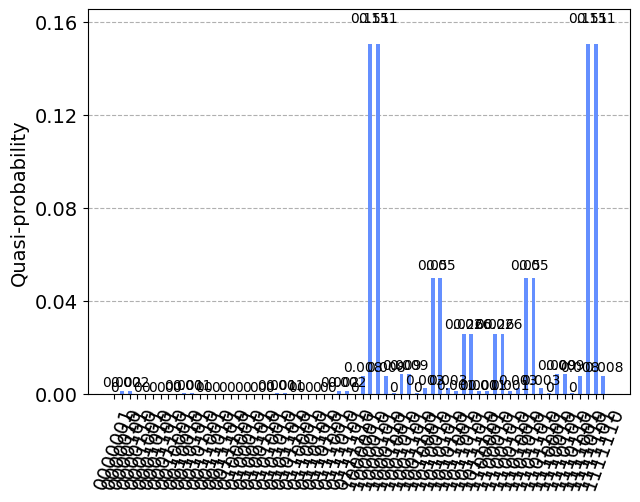

In [11]:
plot_histogram(result.get_counts())

# Playing music

In [62]:
items = hist.items()
keys = np.array(list(hist.keys()))
vals = np.array(list(hist.values()))

In [64]:
from pygame import mixer
import pygame
import time
import numpy as np
from os import listdir
pygame.init();

In [53]:
bd = mixer.Sound("./sounds/drums/bd click.wav")
sn = mixer.Sound("./sounds/drums/sd tone.wav")
hh = mixer.Sound("./sounds/drums/hihat a.wav")
notes = [mixer.Sound("./sounds/synth1/"+ii) for ii in listdir("./sounds/synth1")]

8

In [94]:
keys[idx][0]

'1000010'

In [127]:
# select sequences to play
thresh = 0.04
idx = (vals > thresh)

pattern = keys[idx][0]

counts = len(keys[idx])

melody_index = []
time_index = []
for ii in range(counts):
    melody_index.append(int(keys[idx][ii][0:3],2))
    time_index.append(int(keys[idx][ii][3:6],2))

melody_index = np.array(melody_index)
time_index = np.array(time_index)

In [121]:
bpm = 220
bps = bpm / 60
nbeats = len(time_index)
total_time = nbeats / bps
grid_time = 1 / bps # time per every beat
nloops = 2

melody_index = np.random.choice(range(len(notes)),nbeats) # note[index] to play

timer = pygame.time.Clock()
#melody_bool = [1,1,1,1,1,1,1,1] # which notes to play
melody_bool = np.random.choice((0,1),nbeats)


for _ in range(nloops): # melody loops
    for ii in range(nbeats): # plays melody
        # play melody sounds
        # play always on first beat
        #if melody_bool[ii] or ii == 0: notes[melody_index[ii]].play() # if supposed to play, play
        mask = time_index[time_index == ii]
        if ii == time_index[ii]: print(ii)#notes[melody_index[ii]].play()
        
    
            
        # 
        #time.sleep(grid_time / 2) # sleep time

In [130]:
mask = time_index[time_index == 1]
melody_index = np.array(melody_index)

In [131]:
melody_index

array([4, 4, 5, 5, 6, 6, 7, 7])